<a href="https://colab.research.google.com/github/MadhuriKonnur/housepriceadv/blob/master/draft__AV_Loan__Delinquency_hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Loan default prediction**
*

by Madhuri Konnur

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


     |████████████████████████████████| 993kB 5.1MB/s 


In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# Data  dependencies
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

access data from google  drive , for  example  from  drive  go to sharable  links  of  ( .csv files ) .
Take  test  and  train  data  csv files  shareable  links.
paste  it  and  take  out  id's 

train - https://drive.google.com/open?id=12EigyMTPblusJfY4m90iKrYHhyuxguEl
test- https://drive.google.com/open?id=1ACWrxAvHKcA-Av7G1CtsDw8gLxZCsw5Q

In [0]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#Google drive  data access
train_downloaded=drive.CreateFile({'id':'12EigyMTPblusJfY4m90iKrYHhyuxguEl'})
train_downloaded.GetContentFile('train.csv')
test_downloaded=drive.CreateFile({'id':'1ACWrxAvHKcA-Av7G1CtsDw8gLxZCsw5Q'})
test_downloaded.GetContentFile('test.csv')


In [0]:
train_d=pd.read_csv('train.csv')
test_d=pd.read_csv('test.csv')

In [0]:
train_d.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,loan_purpose,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,22.0,694.0,C86,30.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,44.0,697.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,33.0,780.0,B12,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,44.0,633.0,B12,0.0,638.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,43.0,681.0,C86,0.0,0.0,0.0,0,1,2,3,4,5,6,7,8,9,10,11,1


In [0]:
# check out the size of the data
print("Train data shape:", train_d.shape)
print("Test data shape:", test_d.shape)

Train data shape: (116058, 29)
Test data shape: (35866, 28)


Let's  concat  both  test  and train independent variable . 

In [0]:
raw=pd.concat([train_d, test_d])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [0]:
raw.shape

(151924, 29)

In [0]:
#Let's check if the data set has any missing values. 
raw.columns[raw.isnull().any()]

Index(['m13'], dtype='object')

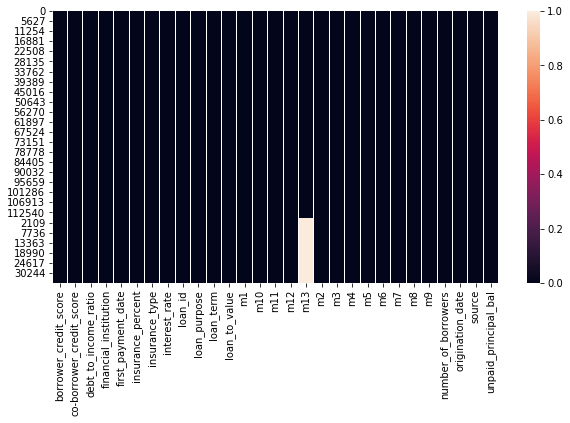

In [0]:
#Checking there is any null value or not
plt.figure(figsize=(10, 5))
sns.heatmap(raw.isnull())

There  no  missing  values . ( No  need to  fill any  missing values)

label  m13  with  blank value  which for  test dataset  . that's what  need to  predict ( which is  showing  blank here)

In [0]:
raw.dtypes

borrower_credit_score       float64
co-borrower_credit_score    float64
debt_to_income_ratio        float64
financial_institution        object
first_payment_date           object
insurance_percent           float64
insurance_type              float64
interest_rate               float64
loan_id                       int64
loan_purpose                 object
loan_term                     int64
loan_to_value                 int64
m1                            int64
m10                           int64
m11                           int64
m12                           int64
m13                         float64
m2                            int64
m3                            int64
m4                            int64
m5                            int64
m6                            int64
m7                            int64
m8                            int64
m9                            int64
number_of_borrowers         float64
origination_date             object
source                      

Encoding string to intiger ( Categoriacal object  to  intiger)

In [0]:
cols = ('source', 'financial_institution', 'origination_date',
       'first_payment_date', 'loan_purpose')



In [0]:
from sklearn.preprocessing import LabelEncoder
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(raw[c].values)) 
    raw[c] = lbl.transform(list(raw[c].values))

0.0    115422
1.0       636
Name: m13, dtype: int64

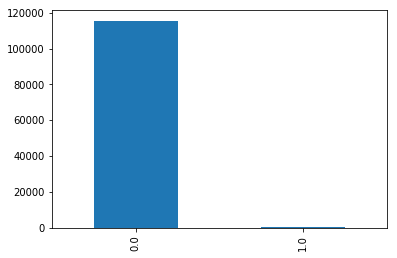

In [0]:
raw['m13'].value_counts().plot('bar')
raw['m13'].value_counts()

In [0]:
# print percentage of questions where target == 1 (Loan delinquency true)
(len(raw.loc[raw.m13==1])) / (len(raw.loc[raw.m13 == 0])) * 100

0.5510214690440297

Here  1's  are in verty less numbers. i.e  only 0.55 %  1's are there. It is  a imbalanced  data.

In [0]:
# Now  dividing  preprocessed raw data  back into  train and  test  data
train=raw[0:116058]
test=raw[116058:151924]

Other  than  m1  to  m12  , many other  feature  influences Loan Delinquency   label

                          borrower_credit_score  ...  unpaid_principal_bal
borrower_credit_score                  1.000000  ...              0.052061
co-borrower_credit_score               0.153952  ...              0.132632
debt_to_income_ratio                  -0.184406  ...              0.073415
financial_institution                  0.002762  ...             -0.063765
first_payment_date                     0.028828  ...              0.024377
insurance_percent                     -0.062849  ...              0.010926
insurance_type                        -0.004608  ...              0.015985
interest_rate                         -0.210468  ...             -0.002854
loan_id                                0.001230  ...              0.005385
loan_purpose                          -0.132056  ...             -0.129275
loan_term                             -0.072021  ...              0.192168
loan_to_value                         -0.142574  ...              0.062447
m1                       

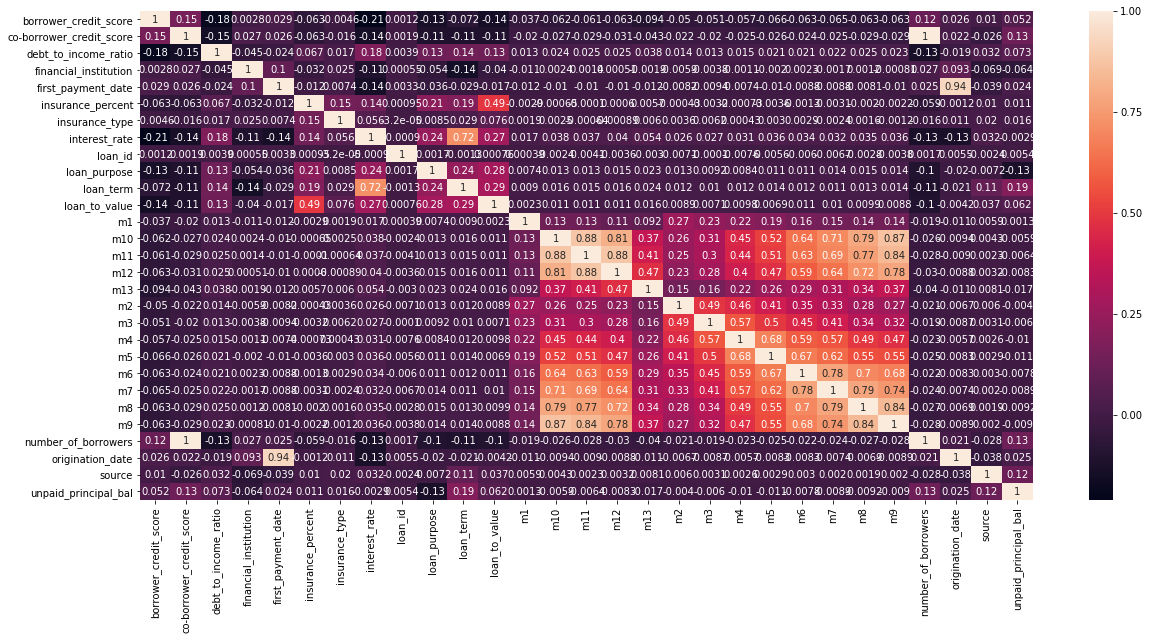

In [0]:
#Correlation plot
corr = train.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr, annot=True)

print(corr)

Data preparation for  prediction

In [0]:
# Separate input features and target
y = train.m13
X = train.drop('m13', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)



Baseline Models

In [0]:
# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [0.]
Test score:  0.9941754265035326


As predicted our accuracy score for classifying all transactions as not fraud is 99.4%!

As the Dummy Classifier predicts only Class 0, it is clearly not a good option for our objective of correctly classifying fraudulent transactions.

Without  training  DummyClassifier to always predict “not Delinquency” just to show how misleading accuracy .

Accuracy might not be our best option for measuring performance.

To deal with imbalance data.  Need  to  consider  some other  metrics those can provide better insight include:


Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
Precision: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.

Recall: the number of true positives divided by the number of positive values in the test data. Recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.

F1: Score: the weighted average of precision and recall.

Logistic Regression


Applying other matrics on LR

In [0]:
# Modeling the data as is
# Train model
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

In [0]:
# Checking accuracy
accuracy_score(y_test, lr_pred)

0.9941754265035326

In [0]:
# Checking unique values
predictions = pd.DataFrame(lr_pred)
predictions[0].value_counts()

0.0    29015
Name: 0, dtype: int64

Logistic Regression performed similar way as Dummy Classifier! We can see that it predicted No instances of class 1,  But can we do better?

In [0]:
# f1 score
f1_score(y_test, lr_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [0]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, lr_pred))

,0,1
0,28846,0
1,169,0


In [0]:
recall_score(y_test, lr_pred)

0.0

Here score  is  not   impressive at  all!
We have a very high accuracy score of 0.994 but a F1 score of only 0.0. And from the confusion matrix, we can see we are misclassifying several observations leading to a recall score dramatically 0.0.

( Need  to  check for  better algorithm)

RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# train model
rfc = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

# predict on test set
rfc_pred = rfc.predict(X_test)

accuracy_score(y_test, rfc_pred)

0.995416164053076

In [0]:
# f1 score
f1_score(y_test, rfc_pred)

0.44351464435146437

In [0]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, rfc_pred))

,0,1
0,28829,17
1,116,53


In [0]:
# recall score
recall_score(y_test, rfc_pred)

0.3136094674556213

Here in RFC accuracy score is slightly increased, both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

**Resampling Techniques**

Oversampling Minority Class¶
Oversampling can be defined as adding more copies of the minority class. Oversampling can be a good choice when you don't have a ton of data to work with. A con to consider when undersampling is that it can cause overfitting and poor generalization to your test set.

We will use the resampling module from Scikit-Learn to randomly replicate samples from the minority class.

Important Note
Always split into test and train sets BEFORE trying any resampling techniques! Oversampling before splitting the data can allow the exact same observations to be present in both the test and train sets! This can allow our model to simply memorize specific data points and cause overfitting.

Oversampling Minority Class¶

In [0]:
from sklearn.utils import resample

In [0]:
# Separate input features and target
y = train.m13
X = train.drop('m13', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

In [0]:
# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)
X.head()

,borrower_credit_score,co-borrower_credit_score,debt_to_income_ratio,financial_institution,first_payment_date,insurance_percent,insurance_type,interest_rate,loan_id,loan_purpose,loan_term,loan_to_value,m1,m10,m11,m12,m2,m3,m4,m5,m6,m7,m8,m9,number_of_borrowers,origination_date,source,unpaid_principal_bal,m13
65425,799.0,0.0,25.0,8,2,0.0,0.0,3.250,219082534298,1,180,77,0,0,0,0,0,0,0,0,0,0,0,0,1.0,4,0,96000,0.0
43591,732.0,701.0,39.0,1,1,0.0,0.0,4.125,728570587585,2,360,80,0,0,0,0,0,0,0,0,0,0,0,0,2.0,3,1,320000,0.0
96308,743.0,768.0,14.0,8,2,25.0,0.0,3.875,602556662077,0,360,90,0,0,0,0,0,0,0,0,0,0,0,0,2.0,4,0,166000,0.0
67357,801.0,792.0,36.0,15,1,0.0,0.0,3.250,230565301697,1,180,67,0,0,0,0,0,0,0,0,0,0,0,0,2.0,3,1,200000,0.0
44053,780.0,790.0,39.0,8,1,12.0,0.0,4.125,700132161906,0,360,85,0,0,0,0,0,0,0,0,0,0,0,0,2.0,3,0,382000,0.0


In [0]:
# separate minority and majority classes
not_delin = X[X.m13==0]
delin = X[X.m13==1]

# upsample minority
delin_upsampled = resample(delin,
                          replace=True, # sample with replacement
                          n_samples=len(not_delin), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_delin, delin_upsampled])

# check new class counts
upsampled.m13.value_counts()

1.0    86576
0.0    86576
Name: m13, dtype: int64

After resampling we have an equal ratio of data points for each class

Now applying logistic regression again with the balanced training data.
Let's  check what  happens!

LR on balanced  data ( from  above upsampled data)

In [0]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.m13
X_train = upsampled.drop('m13', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [0]:
# Checking accuracy
accuracy_score(y_test, upsampled_pred)

0.9941754265035326

In [0]:
# f1 score
f1_score(y_test, upsampled_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [0]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, upsampled_pred))

,0,1
0,28846,0
1,169,0


In [0]:
recall_score(y_test, upsampled_pred)

0.0

Logistic Regression on balanced Oversampling  did not do any  change . So  no good choice !

Undersampling Majority Class

Undersampling Majority Class¶
Undersampling can be defined as removing some observations of the majority class. Undersampling can be a good choice when you have a ton of data -think millions of rows. But a drawback to undersampling is that we are removing information that may be valuable.

We will again use the resampling module from Scikit-Learn to randomly remove samples from the majority class.

In [0]:
# still using our separated classes fraud and not_delin from above

# downsample majority
not_delin_downsampled = resample(not_delin,
                                replace = False, # sample without replacement
                                n_samples = len(delin), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_delin_downsampled, delin])

# checking counts
downsampled.m13.value_counts()

1.0    467
0.0    467
Name: m13, dtype: int64

Again, we have an equal ratio of fraud to not fraud data points, but in this case a much smaller quantity of data to train the model on. Let’s again apply our logistic regression.

In [0]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.m13
X_train = downsampled.drop('m13', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)

In [0]:
# Checking accuracy
accuracy_score(y_test, undersampled_pred)

0.9941754265035326

In [0]:
# f1 score
f1_score(y_test, undersampled_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [0]:
# confusion matrix
pd.DataFrame(confusion_matrix(y_test, undersampled_pred))

,0,1
0,28846,0
1,169,0


In [0]:
recall_score(y_test, undersampled_pred)

0.0

There no  use of undersampled  LR   score for  this  data  set 

Hence  moving  to   Generate Synthetic Samples¶
SMOTE 

 Generate Synthetic Samples¶
    SMOTE 

SMOTE or Synthetic Minority Oversampling Technique is a popular algorithm to creates sythetic observations of the minority class.

A technique similar to upsampling is to create synthetic samples. Here we will use imblearn’s SMOTE or Synthetic Minority Oversampling Technique. SMOTE uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.


In [0]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = train.m13
X = train.drop('m13', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


After generating our synthetic data points, let’s see how our logistic regression performs.

In [0]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9941754265035326

In [0]:
# f1 score
f1_score(y_test, smote_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

In [0]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,28846,0
1,169,0


In [0]:
recall_score(y_test, smote_pred)

0.0

Even SMoTE method  on LR  doesn't  work  well  for  this  dataset.
 So better  go  for  other  algorithms


Random forest using  SMOTE

In [0]:
# train model
smote = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.9953472341892124

In [0]:
# f1 score
f1_score(y_test, smote_pred)

0.4705882352941177

In [0]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,28820,26
1,109,60


In [0]:
recall_score(y_test, smote_pred)

0.35502958579881655

In [0]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10, 15, 20],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30,50, 100]
}

In [0]:
# Create a based model

rcf = RandomForestClassifier()

In [0]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rcf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 41.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 72.3min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 79.3min finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [0]:
#best_grid = grid_search.best_estimator_
#grid_accuracy = evaluate(best_grid, X_train, y_train)

smote=RandomForestClassifier(bootstrap=True, max_depth=20, max_features= 3, min_samples_leaf=3, min_samples_split=8, n_estimators= 100).fit(X_train, y_train)

smote_pred = smote.predict(X_test)

# Checking accuracy
accuracy_score(y_test, smote_pred)

0.995140444597622

In [0]:
# f1 score
f1_score(y_test, smote_pred)

0.4946236559139785

In [0]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, smote_pred))

,0,1
0,28805,41
1,100,69


In [0]:
recall_score(y_test, smote_pred)

0.40828402366863903

Extreme Gradient Boosting (XGB)

In [0]:
#XGB - Without hyperparameters tuning

import xgboost as xgb

# xgb
xgb_cf0 = xgb.XGBClassifier(n_jobs = -1).fit(X_train, y_train)


xgb_cf0_pred = xgb_cf0.predict(X_test.values)

#Checking accuracy
accuracy_score(y_test, xgb_cf0_pred)


#( need  np.array
 #predictions = my_model.predict(test_data_process.values) )

0.9948647251421678

In [0]:
# f1 score
f1_score(y_test, xgb_cf0_pred)

0.4983164983164984

In [0]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, xgb_cf0_pred))

,0,1
0,28792,54
1,95,74


In [0]:
recall_score(y_test, xgb_cf0_pred)

0.4378698224852071

XGB - Grid Search CV to find best n_estimators (F1_score)

Grid search CV is really slow, you can add or remove some hyperparameters (or use early_stop) 

In [0]:
param_grid = {
            'n_estimators': [100, 200, 300,400,500]
              }

CV_xgb_cf1 = GridSearchCV(estimator = xgb_cfl, param_grid = param_grid, scoring ='f1', verbose = 2)
CV_xgb_cf1.fit(X_train, y_train)

best_parameters = CV_xgb_cf1.best_params_
print("The best parameters for using this model is", best_parameters)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  12.1s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.1s remaining:    0.0s


[CV] ................................. n_estimators=100, total=  12.3s
[CV] n_estimators=100 ................................................
[CV] ................................. n_estimators=100, total=  12.3s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=  24.5s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=  24.1s
[CV] n_estimators=200 ................................................
[CV] ................................. n_estimators=200, total=  24.8s
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=  36.6s
[CV] n_estimators=300 ................................................
[CV] ................................. n_estimators=300, total=  36.6s
[CV] n_estimators=300 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  9.0min finished


The best parameters for using this model is {'n_estimators': 300}


XGB - With best hyperparameters

In [0]:
xgb_cf1 = xgb.XGBClassifier(n_jobs = -1, 
                            n_estimators = 300)

xgb_cf1.fit(X_train, y_train)
xgb_cf1_pred = xgb_cfl.predict(X_test.values)

#Checking accuracy
accuracy_score(y_test, xgb_cf1_pred)

0.9948647251421678

In [0]:
# f1 score
f1_score(y_test, xgb_cf1_pred)

0.4983164983164984

In [0]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, xgb_cf1_pred))

,0,1
0,28792,54
1,95,74


In [0]:
recall_score(y_test,xgb_cf1_pred)

0.4378698224852071

In [0]:
from sklearn.ensemble import AdaBoostClassifier
#from catboost import CatBoostClassifier
from sklearn import svm
import lightgbm as lgb
from lightgbm import LGBMClassifier

AdaBoostClassifier¶
AdaBoostClassifier stands for Adaptive Boosting Classifier [5].

Prepare the model
Let's set the parameters for the model and initialize the model.

In [0]:
clf = AdaBoostClassifier(random_state=42,
                         
                         learning_rate=0.8,
                             n_estimators=100)

In [0]:
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test.values)

#Checking accuracy
accuracy_score(y_test, clf_pred)

0.9947613303463726

In [0]:
# f1 score
f1_score(y_test, clf_pred)

0.4829931972789115

In [0]:
# confustion matrix
pd.DataFrame(confusion_matrix(y_test, clf_pred))

,0,1
0,28792,54
1,98,71


In [0]:
recall_score(y_test,clf_pred)

0.42011834319526625